# Planar data classification with one hidden layer

## 1 - Packages

In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets
from testCases_v2 import *

# Ensure inline plotting for Jupyter notebooks
%matplotlib inline

# Set random seed for reproducibility
np.random.seed(1)


## 2 - Dataset

In [5]:
# Load the planar dataset (X: input features, Y: labels)
X, Y = load_planar_dataset()


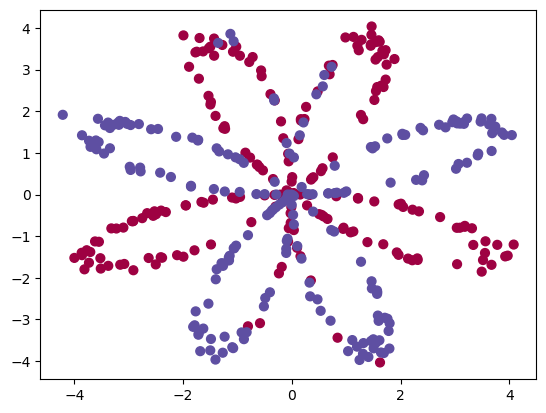

In [6]:
# Visualize the data points with colors representing the labels
# X[0, :] represents the x-coordinates, X[1, :] represents the y-coordinates
# 'c' specifies the colors for each point based on Y (labels), 's' is the size of points
plt.scatter(X[0, :], X[1, :], c=Y.ravel(), s=40, cmap=plt.cm.Spectral)

# Display the plot
plt.show()


In [7]:
# Get the shapes of the input (X) and output (Y)
shape_X = X.shape  # X.shape gives (number of features, number of examples)
shape_Y = Y.shape  # Y.shape gives (1, number of examples)

# Calculate the number of training examples (m)
m = shape_X[1]  # The number of examples is the second dimension of X

# Print the shapes and the number of training examples
print(f'The shape of X is: {shape_X}')
print(f'The shape of Y is: {shape_Y}')
print(f'I have {m} training examples!')


The shape of X is: (2, 400)
The shape of Y is: (1, 400)
I have 400 training examples!


## 3 - Simple Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegressionCV

# Train the logistic regression classifier with cross-validation
clf = LogisticRegressionCV()  # Initialize the Logistic Regression model with default cross-validation
clf.fit(X.T, Y.ravel())  # Transpose X and flatten Y for correct shape in scikit-learn


LogisticRegressionCV()

Accuracy of logistic regression: 47.00% (percentage of correctly labelled datapoints)


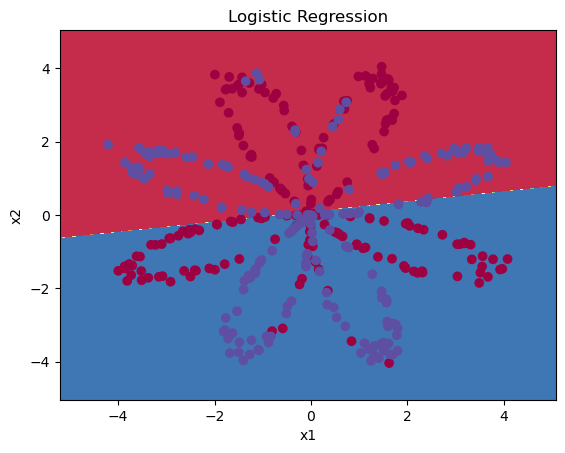

In [10]:
# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: clf.predict(x), X, Y)  # Ensure correct input shape for prediction
plt.title("Logistic Regression")

# Predict the labels using the trained logistic regression model
LR_predictions = clf.predict(X.T)

# Calculate and print the accuracy of logistic regression
accuracy = np.mean(LR_predictions == Y.ravel()) * 100  # Calculate accuracy in percentage
print(f'Accuracy of logistic regression: {accuracy:.2f}% (percentage of correctly labelled datapoints)')


## 4 - Neural Network model

### 4.1 - Defining the neural network structure

In [13]:
def layer_sizes(X, Y):
    """
    Determines the sizes of the input, hidden, and output layers for a neural network.

    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)

    Returns:
    n_x -- size of the input layer (number of features)
    n_h -- size of the hidden layer (preset to 4 neurons)
    n_y -- size of the output layer (number of output classes)
    """
    
    # Size of the input layer (number of input features)
    n_x = X.shape[0]
    
    # Size of the hidden layer (set to 4 neurons as a simple example)
    n_h = 4
    
    # Size of the output layer (number of classes/outputs)
    n_y = Y.shape[0]
    
    # Return the layer sizes as a tuple
    return n_x, n_h, n_y


In [14]:
# Test case to assess the layer_sizes function
X_assess, Y_assess = layer_sizes_test_case()  # Load test data

# Get the sizes of the input, hidden, and output layers
n_x, n_h, n_y = layer_sizes(X_assess, Y_assess)

# Print the sizes of each layer
print(f"The size of the input layer is: n_x = {n_x}")
print(f"The size of the hidden layer is: n_h = {n_h}")
print(f"The size of the output layer is: n_y = {n_y}")


The size of the input layer is: n_x = 5
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 2


### 4.2 - Initialize the model's parameters

In [16]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Initializes the weights and biases for a 2-layer neural network.
    
    Arguments:
    n_x -- size of the input layer (number of input features)
    n_h -- size of the hidden layer (number of hidden units)
    n_y -- size of the output layer (number of output units)
    
    Returns:
    parameters -- python dictionary containing:
                  W1 -- weight matrix of shape (n_h, n_x)
                  b1 -- bias vector of shape (n_h, 1)
                  W2 -- weight matrix of shape (n_y, n_h)
                  b2 -- bias vector of shape (n_y, 1)
    """
    
    # Set random seed for reproducibility
    np.random.seed(2)
    
    # Initialize weight matrices with small random values and bias vectors with zeros
    W1 = np.random.randn(n_h, n_x) * 0.01  # Random initialization for weights (hidden layer)
    b1 = np.zeros((n_h, 1))                # Bias initialization for hidden layer
    W2 = np.random.randn(n_y, n_h) * 0.01  # Random initialization for weights (output layer)
    b2 = np.zeros((n_y, 1))                # Bias initialization for output layer
    
    # Sanity checks to ensure the shapes of weights and biases are correct
    assert W1.shape == (n_h, n_x), f"Expected W1 shape {(n_h, n_x)}, but got {W1.shape}"
    assert b1.shape == (n_h, 1), f"Expected b1 shape {(n_h, 1)}, but got {b1.shape}"
    assert W2.shape == (n_y, n_h), f"Expected W2 shape {(n_y, n_h)}, but got {W2.shape}"
    assert b2.shape == (n_y, 1), f"Expected b2 shape {(n_y, 1)}, but got {b2.shape}"
    
    # Store the parameters in a dictionary and return
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    
    return parameters


In [17]:
# Test case to initialize parameters
n_x, n_h, n_y = initialize_parameters_test_case()  # Load test values for input, hidden, and output layers

# Initialize the parameters (weights and biases)
parameters = initialize_parameters(n_x, n_h, n_y)

# Print the initialized parameters (W1, b1, W2, b2) using f-strings for cleaner output
print(f"W1 = {parameters['W1']}")
print(f"b1 = {parameters['b1']}")
print(f"W2 = {parameters['W2']}")
print(f"b2 = {parameters['b2']}")


W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[0.]]


### 4.3 - The Loop

In [19]:
def forward_propagation(X, parameters):
    """
    Implements forward propagation for a 2-layer neural network.
    
    Arguments:
    X -- input data of shape (n_x, m), where:
         n_x -- number of features (input size)
         m -- number of examples
    parameters -- dictionary containing initialized parameters (W1, b1, W2, b2)
    
    Returns:
    A2 -- The sigmoid output of the second activation (output layer)
    cache -- a dictionary containing intermediate values "Z1", "A1", "Z2", and "A2" for backpropagation
    """
    
    # Retrieve parameters from the dictionary
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Forward propagation
    Z1 = np.dot(W1, X) + b1             # Linear activation for layer 1
    A1 = np.tanh(Z1)                    # Non-linear activation using tanh for layer 1
    Z2 = np.dot(W2, A1) + b2            # Linear activation for layer 2 (output layer)
    A2 = sigmoid(Z2)                    # Sigmoid activation for output layer
    
    # Ensure the output shape of A2 is correct
    assert A2.shape == (1, X.shape[1]), f"Expected A2 shape {(1, X.shape[1])}, but got {A2.shape}"
    
    # Store intermediate values needed for backpropagation in the cache
    cache = {
        "Z1": Z1,
        "A1": A1,
        "Z2": Z2,
        "A2": A2
    }
    
    return A2, cache


In [20]:
# Test the forward propagation function with a test case
X_assess, parameters = forward_propagation_test_case()  # Load test case input data and parameters

# Perform forward propagation
A2, cache = forward_propagation(X_assess, parameters)

# Print the mean of intermediate values from the cache to verify correct implementation
# These mean values ensure the output matches with expected results during testing
print(np.mean(cache['Z1']), np.mean(cache['A1']), np.mean(cache['Z2']), np.mean(cache['A2']))


0.26281864019752443 0.09199904522700109 -1.3076660128732143 0.21287768171914198


In [21]:
# Compute cross-entropy cost
def compute_cost(A2, Y):
    """
    Computes the cross-entropy cost.
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "True" labels vector, of shape (1, number of examples)
    
    Returns:
    cost -- Cross-entropy cost
    """
    
    m = Y.shape[1]  # Number of examples

    # Compute the cross-entropy cost
    logprobs = np.multiply(Y, np.log(A2)) + np.multiply((1 - Y), np.log(1 - A2))
    cost = (-1 / m) * np.sum(logprobs)
    
    # Ensure cost is a scalar
    cost = float(np.squeeze(cost))  # Converts array to scalar if necessary (e.g., [[17]] -> 17)
    assert isinstance(cost, float)
    
    return cost


In [22]:
# Test inputs for compute_cost function
A2, Y_assess, _ = compute_cost_test_case()  

# The third value (parameters) is returned by compute_cost_test_case() but not needed for this calculation.
# Hence, it's ignored here.

# Compute the cost using the compute_cost function
cost = compute_cost(A2, Y_assess)

# Output the computed cost
print(f"Cost = {cost}")


Cost = 0.6930587610394646


In [23]:
def backward_propagation(parameters, cache, X, Y):
    """
    Implements the backward propagation step of the neural network.
    
    Arguments:
    parameters -- dictionary containing network parameters W1, b1, W2, b2
    cache -- dictionary containing intermediate values from forward propagation (A1, A2)
    X -- input data of shape (input size, number of examples)
    Y -- true labels of shape (output size, number of examples)
    
    Returns:
    grads -- dictionary containing gradients of the weights and biases with respect to the cost function
    """
    m = X.shape[1]  # Number of examples

    # Retrieve weights from parameters
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    
    # Retrieve activations from cache
    A1 = cache["A1"]
    A2 = cache["A2"]

    # Compute gradients for the second layer
    dZ2 = A2 - Y  # Derivative of cost with respect to Z2 (output layer)
    dW2 = (1 / m) * np.dot(dZ2, A1.T)  # Gradient of W2
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)  # Gradient of b2
    
    # Compute gradients for the first layer
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))  # Derivative of cost with respect to Z1 (hidden layer)
    dW1 = (1 / m) * np.dot(dZ1, X.T)  # Gradient of W1
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)  # Gradient of b1

    # Store gradients in a dictionary
    grads = {
        "dW1": dW1,
        "db1": db1,
        "dW2": dW2,
        "db2": db2
    }

    return grads


In [24]:
# Test the backward_propagation function with example inputs
parameters, cache, X_assess, Y_assess = backward_propagation_test_case()

# Calculate gradients using backward propagation
grads = backward_propagation(parameters, cache, X_assess, Y_assess)

# Output the calculated gradients for W1, b1, W2, and b2
print("dW1 =", grads["dW1"])
print("db1 =", grads["db1"])
print("dW2 =", grads["dW2"])
print("db2 =", grads["db2"])


dW1 = [[ 0.00301023 -0.00747267]
 [ 0.00257968 -0.00641288]
 [-0.00156892  0.003893  ]
 [-0.00652037  0.01618243]]
db1 = [[ 0.00176201]
 [ 0.00150995]
 [-0.00091736]
 [-0.00381422]]
dW2 = [[ 0.00078841  0.01765429 -0.00084166 -0.01022527]]
db2 = [[-0.16655712]]


In [25]:
def update_parameters(parameters, grads, learning_rate):
    """
    Updates the model parameters using gradient descent.
    
    Arguments:
    parameters -- dictionary containing model parameters (W1, b1, W2, b2)
    grads -- dictionary containing gradients for each parameter (dW1, db1, dW2, db2)
    learning_rate -- the learning rate for gradient descent
    
    Returns:
    parameters -- dictionary containing the updated parameters
    """
    # Retrieve parameters from the dictionary
    W1, b1 = parameters["W1"], parameters["b1"]
    W2, b2 = parameters["W2"], parameters["b2"]
    
    # Retrieve gradients from the dictionary
    dW1, db1 = grads["dW1"], grads["db1"]
    dW2, db2 = grads["dW2"], grads["db2"]

    # Update parameters using gradient descent
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    # Return updated parameters
    return {"W1": W1, "b1": b1, "W2": W2, "b2": b2}


In [26]:
# Test case: Update parameters and display the updated values
parameters, grads = update_parameters_test_case()

# Update the parameters using the provided learning rate
learning_rate = 1.2
parameters = update_parameters(parameters, grads, learning_rate)

# Display updated parameters
print("W1 =", parameters["W1"])
print("b1 =", parameters["b1"])
print("W2 =", parameters["W2"])
print("b2 =", parameters["b2"])


W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 = [[-1.02420756e-06]
 [ 1.27373948e-05]
 [ 8.32996807e-07]
 [-3.20136836e-06]]
W2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 = [[0.00010457]]


### 4.3 - Integrate parts 4.1, 4.2, 4.3 in nn_model()

In [28]:
def nn_model(X, Y, n_h, learning_rate, num_iterations=10000, print_cost=False):
    """
    Implements a neural network model with one hidden layer using gradient descent.

    Arguments:
    X -- Input data of shape (n_x, number of examples)
    Y -- True labels of shape (1, number of examples)
    n_h -- Number of neurons in the hidden layer
    learning_rate -- Learning rate for gradient descent
    num_iterations -- Number of iterations to run the gradient descent loop (default is 10,000)
    print_cost -- If True, prints the cost every 1000 iterations

    Returns:
    parameters -- Parameters learned by the model (weights and biases)
    """
    
    # Determine the input layer size (n_x) and output layer size (n_y)
    n_x = X.shape[0]  # Input layer size (number of features)
    n_y = Y.shape[0]  # Output layer size (number of output classes/labels)
    
    # Initialize parameters (weights and biases)
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    # Gradient descent loop
    for i in range(num_iterations):
        
        # Forward propagation: Calculate predictions and cache intermediate values
        A2, cache = forward_propagation(X, parameters)
        
        # Compute cost function: Calculate cross-entropy loss
        cost = compute_cost(A2, Y)
        
        # Backpropagation: Compute gradients of the cost w.r.t. parameters
        grads = backward_propagation(parameters, cache, X, Y)
        
        # Update parameters using the gradients and learning rate
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print the cost every 1000 iterations if print_cost is True
        if print_cost and i % 1000 == 0:
            print(f"Cost after iteration {i}: {cost:.6f}")
    
    # Return the learned parameters after training
    return parameters


In [29]:
# Test case to assess nn_model function
X_assess, Y_assess = nn_model_test_case()

# Train the model using nn_model with a hidden layer of 4 neurons, learning rate of 1.02, and 10,000 iterations
parameters = nn_model(X_assess, Y_assess, n_h=4, learning_rate=1.02, num_iterations=10000, print_cost=True)

# Output the learned parameters
print(f"W1 = {parameters['W1']}")
print(f"b1 = {parameters['b1']}")
print(f"W2 = {parameters['W2']}")
print(f"b2 = {parameters['b2']}")


Cost after iteration 0: 0.692739
Cost after iteration 1000: 0.000257
Cost after iteration 2000: 0.000127
Cost after iteration 3000: 0.000084
Cost after iteration 4000: 0.000063
Cost after iteration 5000: 0.000050
Cost after iteration 6000: 0.000042
Cost after iteration 7000: 0.000036
Cost after iteration 8000: 0.000031
Cost after iteration 9000: 0.000028
W1 = [[-0.65400312  1.21068652]
 [-0.75688005  1.38443617]
 [ 0.57449374 -1.0957478 ]
 [ 0.76242342 -1.40517716]]
b1 = [[ 0.2841426 ]
 [ 0.34699428]
 [-0.23981061]
 [-0.35351855]]
W2 = [[-2.42329584 -3.22274999  1.97978376  3.31771228]]
b2 = [[0.20282644]]


### 4.5 - Predictions

In [31]:
def predict(parameters, X):
    """
    Predicts the class for each example in X using the learned parameters.
    
    Arguments:
    parameters -- dictionary containing the learned weights and biases
    X -- input data of shape (n_x, m) where n_x is the number of features and m is the number of examples
    
    Returns:
    predictions -- binary vector of predictions (0 or 1) for each example
    """
    
    # Perform forward propagation to compute the predicted probabilities (A2)
    A2, _ = forward_propagation(X, parameters)
    
    # Classify predictions as 1 if A2 > 0.5, else 0 (threshold at 0.5)
    predictions = (A2 > 0.5).astype(int)
    
    return predictions


In [32]:
# Test case for the predict function
parameters, X_assess = predict_test_case()

# Predict the output using the trained parameters and input data
predictions = predict(parameters, X_assess)

# Print the mean of the predictions (used to evaluate how many 1s and 0s are predicted on average)
print(f"Predictions mean = {np.mean(predictions)}")


Predictions mean = 0.6666666666666666


Cost after iteration 0: 0.693048
Cost after iteration 1000: 0.288083
Cost after iteration 2000: 0.254385
Cost after iteration 3000: 0.233864
Cost after iteration 4000: 0.226792
Cost after iteration 5000: 0.222644
Cost after iteration 6000: 0.219731
Cost after iteration 7000: 0.217504
Cost after iteration 8000: 0.219663
Cost after iteration 9000: 0.218664


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

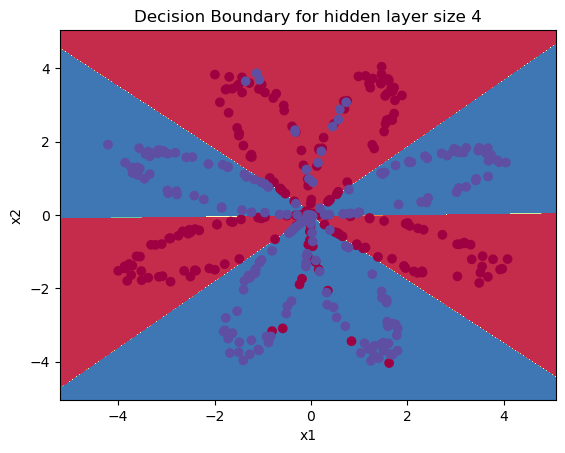

In [33]:
# Build and train a neural network model with a hidden layer of size n_h = 4
# X: input data, Y: true labels, 4: hidden layer size, 1.2: learning rate
parameters = nn_model(X, Y, n_h=4, learning_rate=1.2, num_iterations=10000, print_cost=True)

# Plot the decision boundary for the trained model
# The decision boundary visually shows the classification regions learned by the model
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)

# Set the plot title to indicate the hidden layer size used in the model
plt.title(f"Decision Boundary for hidden layer size {n_h}")


In [34]:
# Predict the outcomes based on the learned parameters
predictions = predict(parameters, X)

# Calculate accuracy by comparing predictions to actual labels
accuracy = np.mean(predictions == Y) * 100

# Print the accuracy in a clean format using an f-string
print(f"Accuracy: {accuracy:.2f}%")


Accuracy: 90.50%


### 4.6 - Tuning hidden layer size

accuracy of hidden layer 1 67.50%
accuracy of hidden layer 2 67.25%
accuracy of hidden layer 3 90.75%
accuracy of hidden layer 4 90.50%
accuracy of hidden layer 5 91.25%
accuracy of hidden layer 10 90.25%
accuracy of hidden layer 20 90.50%


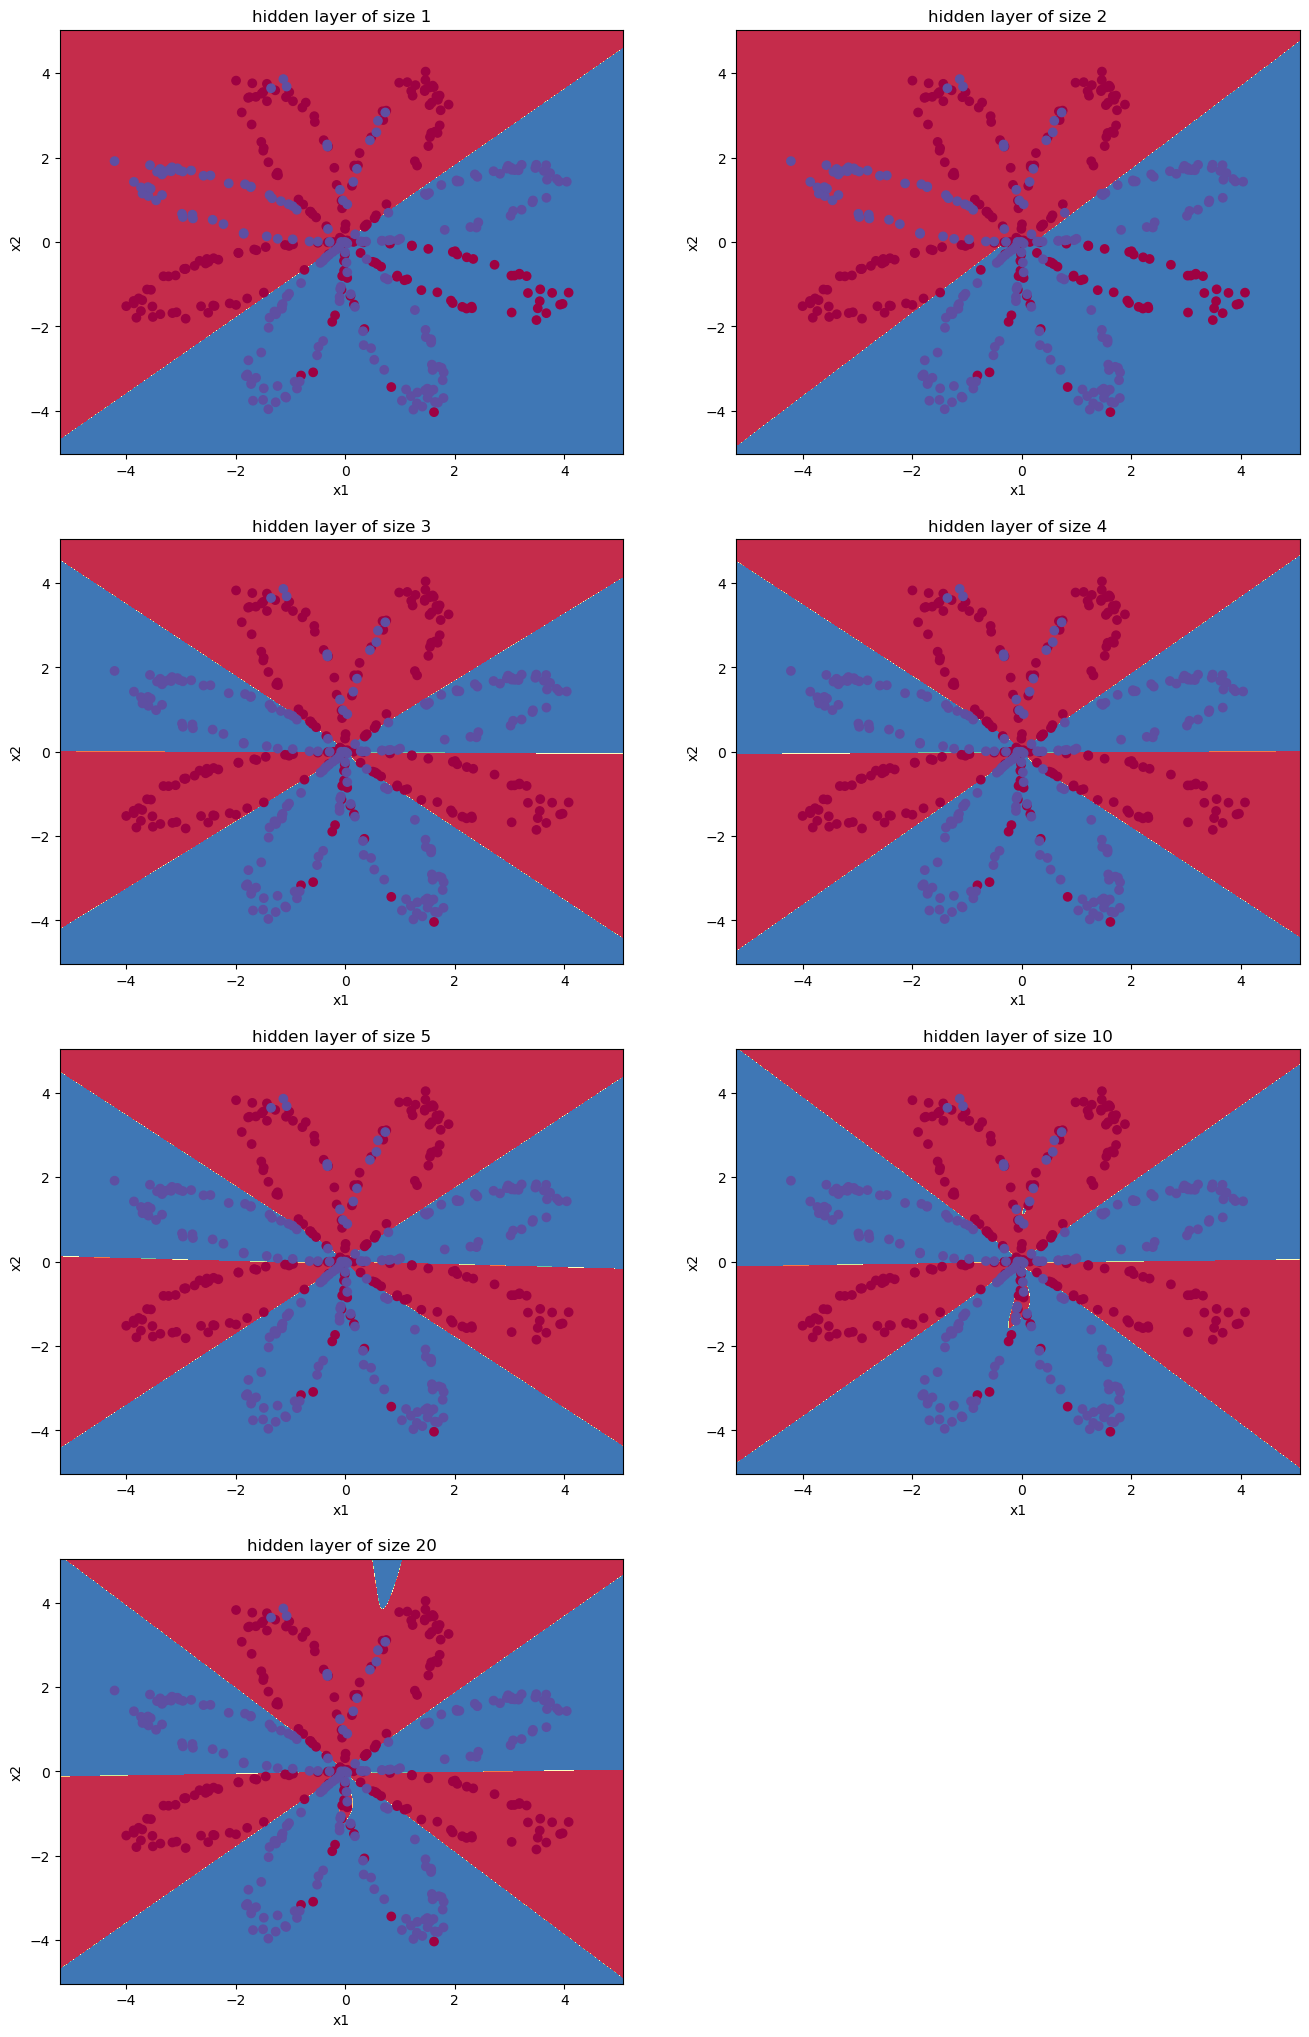

In [36]:
# this block will visualize the plot for different hidden layer size
# and print the accuracy for each configuration

# set up large figure size to hold multiple images
plt.figure(figsize=(16, 32))

# define different hidden layer size to experiment with
hidden_layer_size = [1, 2, 3, 4, 5, 10, 20]

# Loop over the different hidden layer size and plot the decision boundry of each
for i, n_h in enumerate(hidden_layer_size):

    # create a subplot for each hidden layer size
    plt.subplot(5, 2, i+1)
    plt.title(f"hidden layer of size {n_h}")

    # train the neural network with the specified hidden layer size
    parameters = nn_model(X, Y, n_h, learning_rate=1.2, num_iterations=5000)

    # plot the decision boundry
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)

    # make predict on training set
    predictions = predict(parameters, X)

    # calculate accuracy by comparing predictions to the true labels
    accuracy = np.mean(predictions == Y) * 100

    # print the accuracy of the current hidden layer
    print(f"accuracy of hidden layer {n_h} {accuracy:.2f}%")

## 5) Performance on other datasets

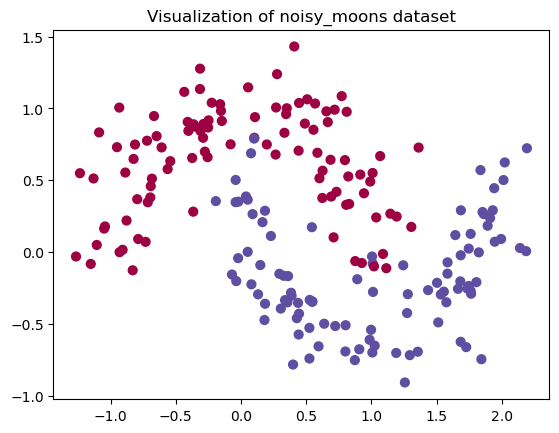

In [38]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles, make_blobs, make_gaussian_quantiles

# Load additional datasets
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

# Dictionary to map dataset names to the actual data
datasets = {
    "noisy_circles": noisy_circles,
    "noisy_moons": noisy_moons,
    "blobs": blobs,
    "gaussian_quantiles": gaussian_quantiles
}

# Choose the dataset you want to use
dataset = "noisy_moons"  # Modify this line to switch datasets

# Extract features (X) and labels (Y) from the selected dataset
X, Y = datasets[dataset]

# Transpose the feature matrix for compatibility with the model
X, Y = X.T, Y.reshape(1, Y.shape[0])  # X.T for features, reshape Y for consistent shape

# For the 'blobs' dataset, convert to binary classification (0 or 1)
if dataset == "blobs":
    Y = Y % 2

# Visualize the dataset with a scatter plot
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral)
plt.title(f"Visualization of {dataset} dataset")
plt.show()
